# Import libary that essential

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

## Read data from file

In [2]:
data = pd.read_csv('./../data/Madrid Daily Weather 1997-2015.csv')

## Preparation
- look at the over all of data

In [3]:
data.describe(include='all')

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
count,6812,6810.000000,6809.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,...,5872.000000,5872.000000,5872.000000,6812.000000,6812.000000,3506.000000,6812.000000,5440.000000,1798,6812.000000
unique,6812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN
top,1997-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rain,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1140,NaN
mean,NaN,21.039648,14.658687,8.640529,8.120705,4.976211,1.451248,81.139354,57.971366,34.729369,...,14.644074,11.719857,9.134877,21.953171,9.170728,43.988306,0.111182,3.206066,NaN,197.234586
std,NaN,8.867187,7.580461,6.837626,4.741067,4.654270,4.909705,17.531839,19.675744,19.320359,...,8.770024,5.592324,5.075065,9.903914,5.110013,12.252462,0.967174,1.808948,NaN,119.872777
min,NaN,0.000000,-3.000000,-10.000000,-12.000000,-15.000000,-22.000000,16.000000,15.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,NaN,-1.000000
25%,NaN,13.000000,8.000000,3.000000,5.000000,2.000000,-2.000000,68.000000,41.000000,19.000000,...,10.000000,10.000000,7.000000,14.000000,6.000000,35.000000,0.000000,2.000000,NaN,66.000000
50%,NaN,20.000000,14.000000,9.000000,8.000000,6.000000,2.000000,87.000000,59.000000,32.000000,...,10.000000,10.000000,10.000000,21.000000,8.000000,42.000000,0.000000,3.000000,NaN,223.000000
75%,NaN,29.000000,21.000000,14.000000,12.000000,8.000000,5.000000,94.000000,74.000000,47.750000,...,10.000000,10.000000,10.000000,27.000000,11.000000,52.000000,0.000000,5.000000,NaN,299.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CET                          6812 non-null   object 
 1   Max TemperatureC             6810 non-null   float64
 2   Mean TemperatureC            6809 non-null   float64
 3   Min TemperatureC             6810 non-null   float64
 4   Dew PointC                   6810 non-null   float64
 5   MeanDew PointC               6810 non-null   float64
 6   Min DewpointC                6810 non-null   float64
 7   Max Humidity                 6810 non-null   float64
 8    Mean Humidity               6810 non-null   float64
 9    Min Humidity                6810 non-null   float64
 10   Max Sea Level PressurehPa   6812 non-null   int64  
 11   Mean Sea Level PressurehPa  6812 non-null   int64  
 12   Min Sea Level PressurehPa   6812 non-null   int64  
 13   Max VisibilityKm 

In [5]:
data.head(10)
data[data[' Events'] == 'Rain']

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.00,5.0,Rain,143
7,1997-01-08,8.0,4.0,1.0,7.0,4.0,1.0,100.0,96.0,87.0,...,10.0,8.0,4.0,26,8,NaN,0.00,7.0,Rain,273
8,1997-01-09,12.0,10.0,8.0,8.0,3.0,0.0,100.0,65.0,44.0,...,10.0,10.0,10.0,48,23,48.0,0.00,4.0,Rain,274
14,1997-01-15,11.0,8.0,5.0,7.0,5.0,4.0,100.0,83.0,62.0,...,10.0,10.0,8.0,10,3,NaN,0.00,6.0,Rain,16
16,1997-01-17,13.0,9.0,5.0,9.0,5.0,1.0,100.0,78.0,47.0,...,10.0,10.0,7.0,27,13,NaN,0.00,4.0,Rain,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6752,2015-11-02,15.0,13.0,11.0,12.0,9.0,8.0,95.0,80.0,54.0,...,31.0,13.0,4.0,27,11,48.0,11.94,6.0,Rain,132
6753,2015-11-03,15.0,12.0,9.0,11.0,10.0,8.0,94.0,84.0,70.0,...,31.0,13.0,2.0,19,13,48.0,0.51,6.0,Rain,174
6794,2015-12-14,15.0,11.0,7.0,9.0,6.0,5.0,100.0,76.0,43.0,...,24.0,10.0,3.0,14,3,40.0,0.00,5.0,Rain,190
6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,31.0,14.0,8.0,27,8,45.0,0.51,7.0,Rain,243


## Cleaning topic
- tidy data
- change data type
- remove duplicate
- fill missing value

In [6]:
# tidy data
# remove space from column
data.columns = data.columns.str.strip()
# change format name column
data.rename(columns = {'Dew PointC':'Max Dew PointC', 'MeanDew PointC':'Mean Dew PointC', 'Min DewpointC':'Min Dew PointC'}, inplace=True)

In [7]:
# change data type
# convert object type to datetimes type
data['CET'] = pd.to_datetime(data['CET'])

In [8]:
# check duplicate data
data[data['CET'].duplicated()]

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Max Dew PointC,Mean Dew PointC,Min Dew PointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees


In [9]:
# fill missing value
data.isna().sum()

CET                              0
Max TemperatureC                 2
Mean TemperatureC                3
Min TemperatureC                 2
Max Dew PointC                   2
Mean Dew PointC                  2
Min Dew PointC                   2
Max Humidity                     2
Mean Humidity                    2
Min Humidity                     2
Max Sea Level PressurehPa        0
Mean Sea Level PressurehPa       0
Min Sea Level PressurehPa        0
Max VisibilityKm               940
Mean VisibilityKm              940
Min VisibilitykM               940
Max Wind SpeedKm/h               0
Mean Wind SpeedKm/h              0
Max Gust SpeedKm/h            3306
Precipitationmm                  0
CloudCover                    1372
Events                        5014
WindDirDegrees                   0
dtype: int64

In [10]:
data.drop(['Events', 'Max Gust SpeedKm/h'], axis='columns', inplace=True)

In [11]:
data[data['Max TemperatureC'].isna()]

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Max Dew PointC,Mean Dew PointC,Min Dew PointC,Max Humidity,Mean Humidity,Min Humidity,...,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
1539,2001-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1019,1018,NaN,NaN,NaN,26,14,0.0,NaN,231
1540,2001-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1019,1016,NaN,NaN,NaN,26,11,0.0,NaN,248


In [12]:
data.drop([1539, 1540], axis='index' , inplace=True)

In [13]:
temp = pd.DataFrame({'Mean TemperatureC': (data['Max TemperatureC'] + data['Min TemperatureC']) // 2})
data.fillna(value=temp, inplace=True)

In [14]:
data.isna().sum()

CET                              0
Max TemperatureC                 0
Mean TemperatureC                0
Min TemperatureC                 0
Max Dew PointC                   0
Mean Dew PointC                  0
Min Dew PointC                   0
Max Humidity                     0
Mean Humidity                    0
Min Humidity                     0
Max Sea Level PressurehPa        0
Mean Sea Level PressurehPa       0
Min Sea Level PressurehPa        0
Max VisibilityKm               938
Mean VisibilityKm              938
Min VisibilitykM               938
Max Wind SpeedKm/h               0
Mean Wind SpeedKm/h              0
Precipitationmm                  0
CloudCover                    1370
WindDirDegrees                   0
dtype: int64

In [15]:
data.isna().sum(axis=0) * 100/len(data)

CET                            0.000000
Max TemperatureC               0.000000
Mean TemperatureC              0.000000
Min TemperatureC               0.000000
Max Dew PointC                 0.000000
Mean Dew PointC                0.000000
Min Dew PointC                 0.000000
Max Humidity                   0.000000
Mean Humidity                  0.000000
Min Humidity                   0.000000
Max Sea Level PressurehPa      0.000000
Mean Sea Level PressurehPa     0.000000
Min Sea Level PressurehPa      0.000000
Max VisibilityKm              13.773862
Mean VisibilityKm             13.773862
Min VisibilitykM              13.773862
Max Wind SpeedKm/h             0.000000
Mean Wind SpeedKm/h            0.000000
Precipitationmm                0.000000
CloudCover                    20.117474
WindDirDegrees                 0.000000
dtype: float64

In [33]:
missing_vis = data[data['Mean VisibilityKm'].isna()]

In [40]:
data[data.CET.dt.year == 2013]

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Max Dew PointC,Mean Dew PointC,Min Dew PointC,Max Humidity,Mean Humidity,Min Humidity,...,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
5717,2013-01-01,9.0,6.0,3.0,6.0,4.0,2.0,100.0,93.0,76.0,...,1021,1018,11.0,7.0,2.0,10,5,1.02,4.0,154
5718,2013-01-02,11.0,6.0,0.0,3.0,2.0,0.0,100.0,81.0,42.0,...,1026,1024,31.0,6.0,0.0,37,10,0.00,4.0,12
5719,2013-01-03,13.0,7.0,0.0,2.0,-1.0,-5.0,93.0,66.0,30.0,...,1034,1028,31.0,31.0,31.0,10,5,0.00,NaN,12
5720,2013-01-04,12.0,4.0,-3.0,1.0,-2.0,-5.0,93.0,70.0,36.0,...,1038,1036,31.0,31.0,31.0,8,5,0.00,NaN,350
5721,2013-01-05,12.0,4.0,-3.0,2.0,-1.0,-4.0,100.0,81.0,49.0,...,1034,1031,31.0,15.0,6.0,10,5,0.00,NaN,351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6077,2013-12-27,12.0,10.0,8.0,10.0,8.0,5.0,100.0,88.0,74.0,...,1015,1011,31.0,14.0,2.0,35,26,3.05,6.0,214
6078,2013-12-28,10.0,8.0,6.0,10.0,3.0,-3.0,100.0,66.0,32.0,...,1015,1008,31.0,14.0,3.0,34,21,2.03,4.0,258
6079,2013-12-29,10.0,4.0,-2.0,1.0,-1.0,-4.0,100.0,70.0,28.0,...,1028,1023,31.0,28.0,9.0,23,10,0.00,NaN,160
6080,2013-12-30,8.0,2.0,-3.0,2.0,-1.0,-3.0,100.0,81.0,47.0,...,1029,1026,31.0,24.0,11.0,13,5,0.00,8.0,30


In [34]:
missing_vis.count()

CET                           938
Max TemperatureC              938
Mean TemperatureC             938
Min TemperatureC              938
Max Dew PointC                938
Mean Dew PointC               938
Min Dew PointC                938
Max Humidity                  938
Mean Humidity                 938
Min Humidity                  938
Max Sea Level PressurehPa     938
Mean Sea Level PressurehPa    938
Min Sea Level PressurehPa     938
Max VisibilityKm                0
Mean VisibilityKm               0
Min VisibilitykM                0
Max Wind SpeedKm/h            938
Mean Wind SpeedKm/h           938
Precipitationmm               938
CloudCover                      1
WindDirDegrees                938
dtype: int64

In [38]:
missing_vis.groupby(missing_vis.CET.dt.year).count()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Max Dew PointC,Mean Dew PointC,Min Dew PointC,Max Humidity,Mean Humidity,Min Humidity,...,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
1997,33,33,33,33,33,33,33,33,33,33,...,33,33,0,0,0,33,33,33,0,33
1998,51,51,51,51,51,51,51,51,51,51,...,51,51,0,0,0,51,51,51,0,51
1999,44,44,44,44,44,44,44,44,44,44,...,44,44,0,0,0,44,44,44,0,44
2000,50,50,50,50,50,50,50,50,50,50,...,50,50,0,0,0,50,50,50,1,50
2001,53,53,53,53,53,53,53,53,53,53,...,53,53,0,0,0,53,53,53,0,53
2002,37,37,37,37,37,37,37,37,37,37,...,37,37,0,0,0,37,37,37,0,37
2003,39,39,39,39,39,39,39,39,39,39,...,39,39,0,0,0,39,39,39,0,39
2004,56,56,56,56,56,56,56,56,56,56,...,56,56,0,0,0,56,56,56,0,56
2005,84,84,84,84,84,84,84,84,84,84,...,84,84,0,0,0,84,84,84,0,84


In [39]:
missing_vis.groupby(missing_vis.CET.dt.month).count()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Max Dew PointC,Mean Dew PointC,Min Dew PointC,Max Humidity,Mean Humidity,Min Humidity,...,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
1,62,62,62,62,62,62,62,62,62,62,...,62,62,0,0,0,62,62,62,0,62
2,82,82,82,82,82,82,82,82,82,82,...,82,82,0,0,0,82,82,82,0,82
3,109,109,109,109,109,109,109,109,109,109,...,109,109,0,0,0,109,109,109,0,109
4,47,47,47,47,47,47,47,47,47,47,...,47,47,0,0,0,47,47,47,0,47
5,41,41,41,41,41,41,41,41,41,41,...,41,41,0,0,0,41,41,41,0,41
6,61,61,61,61,61,61,61,61,61,61,...,61,61,0,0,0,61,61,61,0,61
7,112,112,112,112,112,112,112,112,112,112,...,112,112,0,0,0,112,112,112,1,112
8,100,100,100,100,100,100,100,100,100,100,...,100,100,0,0,0,100,100,100,0,100
9,96,96,96,96,96,96,96,96,96,96,...,96,96,0,0,0,96,96,96,0,96


## Manage outlier data

In [16]:
temp = pd.melt(data, value_vars=data.columns[1:], var_name='class', value_name='value')

/home/childenchaos/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


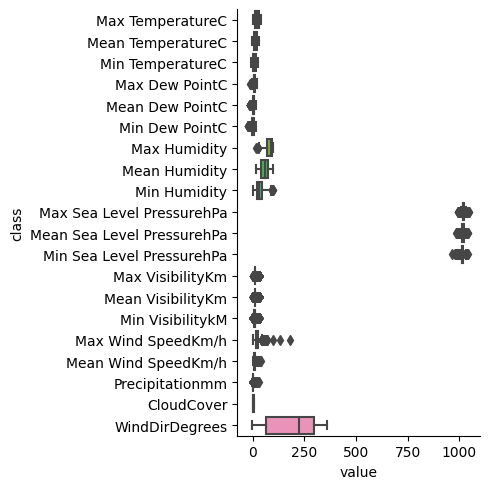

In [17]:
sns.catplot(data=temp, x="value", y="class", kind="box")

In [18]:
without_pressure1 = pd.melt(data, value_vars=data.columns[13:16], var_name='class', value_name='value')
without_pressure2 = pd.melt(data, value_vars=data.columns[18], var_name='class', value_name='value')
pressure = pd.melt(data, value_vars=data.columns[10:13], var_name='class', value_name='value')

/home/childenchaos/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/childenchaos/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/childenchaos/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


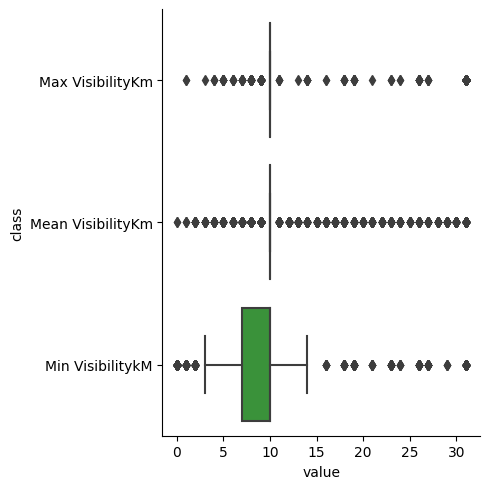

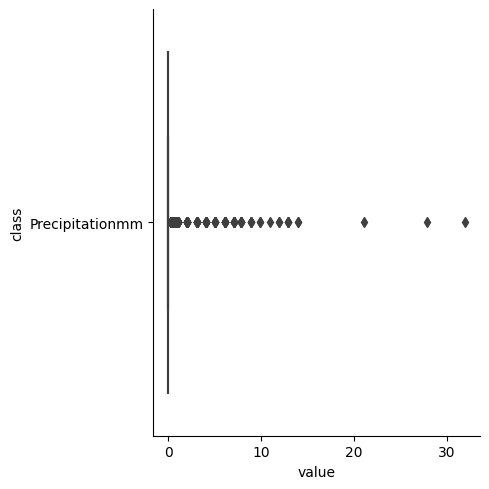

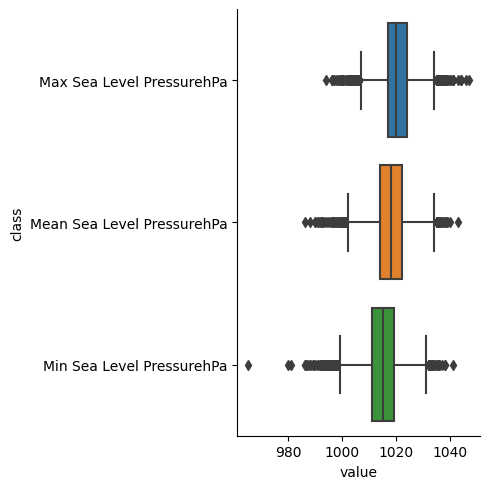

In [19]:
sns.catplot(data=without_pressure1, x="value", y="class", kind="box")
sns.catplot(data=without_pressure2, x="value", y="class", kind="box")
sns.catplot(data=pressure, x="value", y="class", kind="box")

In [29]:
# clear Min pressure, Max speed wind, precipitation, Min&Max Humidity
data[(data['Mean VisibilityKm'] < 6)].groupby(data.CET.dt.month).count()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Max Dew PointC,Mean Dew PointC,Min Dew PointC,Max Humidity,Mean Humidity,Min Humidity,...,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
1,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,48,50
2,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,10,11
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
11,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
12,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,57,61


In [ ]:
data[(data['CET'] >= '2001-03-01') & (data['CET'] <= '2001-03-31')]

In [ ]:
temp = data[(data['Precipitationmm'] > 0) & (data['Precipitationmm'] < 0.5)]
temp

In [ ]:
temp.groupby(temp.CET.dt.month).count()

## Analysis data

## Visualize

### topic 
- how different of data in range between 10 year
- what is pattern of temperature in each year
- Max temperature average in a year
- Min temperature average in a year

In [ ]:
temp_and_humidity = data[['Mean TemperatureC', 'Mean Humidity']]
# temp_and_humidity.sort_values(by='Mean TemperatureC').head(20)
# temp_and_humidity['year'] = data['CET'].dt.year
# temp_and_humidity
# year_ = data.groupby(data.CET.dt.year).head()
# year_ = data
# sns.lineplot(data=temp_and_humidity[temp_and_humidity['year'] < 2000], x='Mean TemperatureC', y='Mean Humidity', hue='year' , style='year')
sns.lineplot(data=temp_and_humidity, x='Mean TemperatureC', y='Mean Humidity')

In [ ]:
temp_and_humidity = data[['Mean Dew PointC', 'Mean TemperatureC']]
sns.lineplot(data=temp_and_humidity, x='Mean Dew PointC', y='Mean TemperatureC')

In [ ]:
data[data['Mean TemperatureC'] == 5]['Mean Humidity'].mean()

In [ ]:
# select year from 2005 - 2015 that we interest
focus_data = data[(data['CET'] >= '1997-01-01')]

In [ ]:
# group data by year
focus_data_year = focus_data.groupby(focus_data.CET.dt.year)

In [ ]:
# find mean of temperature in a month
min_temp_y = pd.DataFrame(focus_data_year['Min TemperatureC'].mean())
max_temp_y = pd.DataFrame(focus_data_year['Max TemperatureC'].mean())
mean_temp_y = pd.DataFrame(focus_data_year['Mean TemperatureC'].mean())

In [ ]:
# group max min mean
temp_y = pd.concat([min_temp_y, mean_temp_y, max_temp_y], axis=1)
temp_y

In [ ]:
# focusing data with lastest year
focus_data_month = data[(data['CET'] >= '2015-01-01')]

In [ ]:
# group data by month
focus_data_month = focus_data_month.groupby(focus_data_month.CET.dt.month)

In [ ]:
# mean of max, min and mean value
min_temp_m = pd.DataFrame(focus_data_month['Min TemperatureC'].mean())
max_temp_m = pd.DataFrame(focus_data_month['Max TemperatureC'].mean())
mean_temp_m = pd.DataFrame(focus_data_month['Mean TemperatureC'].mean())

In [ ]:
# group three data
temp_m = pd.concat([min_temp_m, mean_temp_m, max_temp_m], axis=1)
temp_m

In [ ]:
# temperature per year
temp_y.plot(kind="bar", figsize = (10, 4), color={'Max TemperatureC': '#FF5733', 'Mean TemperatureC': '#229954', 'Min TemperatureC': '#55799D'})
plt.xlabel("Year")
plt.ylabel("Celsius")
plt.ylim(0,40)

In [ ]:
# temperature in latest year
temp_m.plot(kind="bar", figsize = (10, 4), color={'Max TemperatureC': '#FF5733', 'Mean TemperatureC': '#229954', 'Min TemperatureC': '#55799D'})
# temp_m.plot(kind="bar", figsize = (10, 4), color=['blue', 'oran'])
plt.xlabel("Month")
plt.ylabel("Celsius")
plt.ylim(-5,40)

## test

In [ ]:
# choose column by index
# data.iloc[:, :3] 

## useful link
- https://www.analyticsvidhya.com/blog/2021/06/data-cleaning-using-pandas/#What_Is_Data_Cleaning? (cleaning data)
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html (pandas school)